In [9]:
import numpy as np
import pandas as pd
import math
import re

In [10]:
f = open('/Users/lunaryk/Desktop/Traffic-Demand-Evaluation/Bigscity-LibCity/libcity/log/13898-STGCN-PEMS_BAY_0.5-May-28-2022_13-25-32.log', 'r')


In [11]:
lines = f.read().splitlines()
f.close()

In [12]:
df = pd.DataFrame(lines, columns = ['line'])
df

,line
0,"2022-05-28 13:25:32,272 - INFO - Log directory..."
1,"2022-05-28 13:25:32,272 - INFO - Begin pipelin..."
2,"2022-05-28 13:25:32,272 - INFO - {'task': 'tra..."
3,"2022-05-28 13:25:32,277 - INFO - Loaded file P..."
4,"2022-05-28 13:25:32,279 - INFO - set_weight_li..."
...,...
441,8 2.051070 inf 21.154331 4.599384 2.0...
442,9 2.134927 inf 22.825794 4.777635 2.1...
443,10 2.212193 inf 24.380976 4.937709 2.2...
444,11 2.283501 inf 25.833002 5.082618 2.2...


In [13]:
# get rows that start the training
start_training_row_no = df[df['line'].str.contains('Start training') == True].index.tolist()[0]
df[df['line'].str.contains('Start training') == True].index.tolist()[0]

98

In [14]:
lines[29].split()

['(tconv2):', 'TemporalConvLayer(']

In [15]:
info = df[df['line'].str.contains('Epoch \[.*\]') == True].reset_index(drop=True)
df[df['line'].str.contains('Epoch \[.*\]') == True].reset_index(drop=True)

,line
0,"2022-05-28 13:28:10,711 - INFO - Epoch [0/100]..."
1,"2022-05-28 13:30:16,907 - INFO - Epoch [1/100]..."
2,"2022-05-28 13:32:22,796 - INFO - Epoch [2/100]..."
3,"2022-05-28 13:34:28,134 - INFO - Epoch [3/100]..."
4,"2022-05-28 13:36:29,310 - INFO - Epoch [4/100]..."
...,...
95,"2022-05-28 16:35:33,888 - INFO - Epoch [95/100..."
96,"2022-05-28 16:37:56,071 - INFO - Epoch [96/100..."
97,"2022-05-28 16:40:18,379 - INFO - Epoch [97/100..."
98,"2022-05-28 16:42:03,405 - INFO - Epoch [98/100..."


In [16]:
# main_df = pd.DataFrame(columns=['time', 'epoch', 'train_loss', 'val_loss', 'lr', 'time_taken'])
info['line'][0].split()

['2022-05-28',
 '13:28:10,711',
 '-',
 'INFO',
 '-',
 'Epoch',
 '[0/100]',
 'train_loss:',
 '6.6599,',
 'val_loss:',
 '31.0240,',
 'lr:',
 '0.001000,',
 '127.54s']

In [17]:
info.assign(epoch=lambda x: (x['line'][0].split()[6]))

,line,epoch
0,"2022-05-28 13:28:10,711 - INFO - Epoch [0/100]...",[0/100]
1,"2022-05-28 13:30:16,907 - INFO - Epoch [1/100]...",[0/100]
2,"2022-05-28 13:32:22,796 - INFO - Epoch [2/100]...",[0/100]
3,"2022-05-28 13:34:28,134 - INFO - Epoch [3/100]...",[0/100]
4,"2022-05-28 13:36:29,310 - INFO - Epoch [4/100]...",[0/100]
...,...,...
95,"2022-05-28 16:35:33,888 - INFO - Epoch [95/100...",[0/100]
96,"2022-05-28 16:37:56,071 - INFO - Epoch [96/100...",[0/100]
97,"2022-05-28 16:40:18,379 - INFO - Epoch [97/100...",[0/100]
98,"2022-05-28 16:42:03,405 - INFO - Epoch [98/100...",[0/100]


In [18]:
info['epoch'] = info['line'].apply(lambda x: x.split()[6])
info['train_loss'] = info['line'].apply(lambda x: float(x.split()[8][:-1]))
info['val_loss'] = info['line'].apply(lambda x: float(x.split()[10][:-1]))
info['lr'] = info['line'].apply(lambda x: float(x.split()[12][:-1]))
info['time_taken'] = info['line'].apply(lambda x: float(x.split()[13][:-1]))
info



,line,epoch,train_loss,val_loss,lr,time_taken
0,"2022-05-28 13:28:10,711 - INFO - Epoch [0/100]...",[0/100],6.6599,31.0240,0.001000,127.54
1,"2022-05-28 13:30:16,907 - INFO - Epoch [1/100]...",[1/100],3.2735,37.0349,0.001000,126.18
2,"2022-05-28 13:32:22,796 - INFO - Epoch [2/100]...",[2/100],2.9586,25.2222,0.001000,125.89
3,"2022-05-28 13:34:28,134 - INFO - Epoch [3/100]...",[3/100],2.7756,30.1896,0.001000,125.33
4,"2022-05-28 13:36:29,310 - INFO - Epoch [4/100]...",[4/100],2.6665,24.0873,0.000700,121.18
...,...,...,...,...,...,...
95,"2022-05-28 16:35:33,888 - INFO - Epoch [95/100...",[95/100],1.9641,17.5218,0.000001,140.07
96,"2022-05-28 16:37:56,071 - INFO - Epoch [96/100...",[96/100],1.9641,17.5342,0.000001,142.18
97,"2022-05-28 16:40:18,379 - INFO - Epoch [97/100...",[97/100],1.9640,17.4145,0.000001,142.31
98,"2022-05-28 16:42:03,405 - INFO - Epoch [98/100...",[98/100],1.9640,17.4166,0.000001,105.03


<AxesSubplot:>

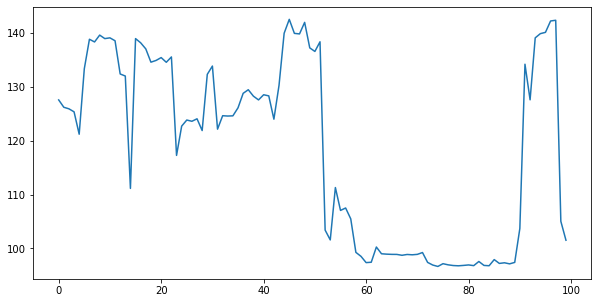

In [36]:
info['time_taken'].plot.line(figsize=(10, 5))

In [85]:
# statistics
# main_df = pd.DataFrame(columns=['time', 'epoch', 'train_loss', 'val_loss', 'lr', 'time_taken'])
stats = {
    'max_epoch': int(re.search('\d+(?=\])', info['epoch'][0]).group(0)),
    'val_loss_min': info['val_loss'].min(),
    'train_loss_min': info['train_loss'].min(),
    'train_loss_min_index': [info[info['train_loss'] == info['train_loss'].min()].index.tolist()],
    'num_epoch': info.shape[0],
    'time_taken_mean': info['time_taken'].mean(),
    'time_taken_median': info['time_taken'].median(),
    'time_taken_max': info['time_taken'].max(),
    'time_taken_min': info['time_taken'].min(),
    'time_taken_std': info['time_taken'].std()
}

pd.DataFrame.from_dict(stats)





,max_epoch,val_loss_min,train_loss_min,train_loss_min_index,num_epoch,time_taken_mean,time_taken_median,time_taken_max,time_taken_min,time_taken_std
0,100,17.2142,1.964,"[97, 98, 99]",100,118.6158,124.005,142.48,96.66,17.143291


In [44]:
info

,line,epoch,train_loss,val_loss,lr,time_taken
0,"2022-05-28 13:28:10,711 - INFO - Epoch [0/100]...",[0/100],6.6599,31.0240,0.001000,127.54
1,"2022-05-28 13:30:16,907 - INFO - Epoch [1/100]...",[1/100],3.2735,37.0349,0.001000,126.18
2,"2022-05-28 13:32:22,796 - INFO - Epoch [2/100]...",[2/100],2.9586,25.2222,0.001000,125.89
3,"2022-05-28 13:34:28,134 - INFO - Epoch [3/100]...",[3/100],2.7756,30.1896,0.001000,125.33
4,"2022-05-28 13:36:29,310 - INFO - Epoch [4/100]...",[4/100],2.6665,24.0873,0.000700,121.18
...,...,...,...,...,...,...
95,"2022-05-28 16:35:33,888 - INFO - Epoch [95/100...",[95/100],1.9641,17.5218,0.000001,140.07
96,"2022-05-28 16:37:56,071 - INFO - Epoch [96/100...",[96/100],1.9641,17.5342,0.000001,142.18
97,"2022-05-28 16:40:18,379 - INFO - Epoch [97/100...",[97/100],1.9640,17.4145,0.000001,142.31
98,"2022-05-28 16:42:03,405 - INFO - Epoch [98/100...",[98/100],1.9640,17.4166,0.000001,105.03


In [84]:
info['epoch'][0]
int(re.search('\d+(?=\])', info['epoch'][0]).group(0))

100